### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

初始数据量：(20358, 34)
去重后数据量：(19779, 34)
缺失值处理后数据量：(1365, 33)


C:\Users\ZJYY\AppData\Local\Temp\ipykernel_11808\1354245613.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='pastel')


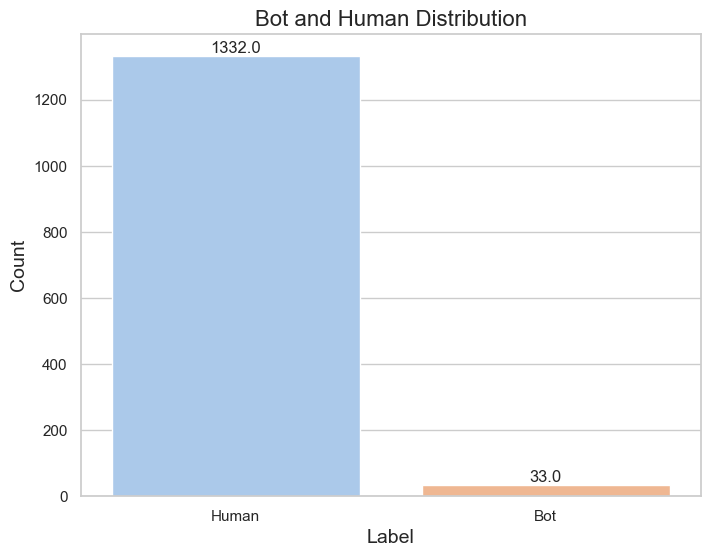

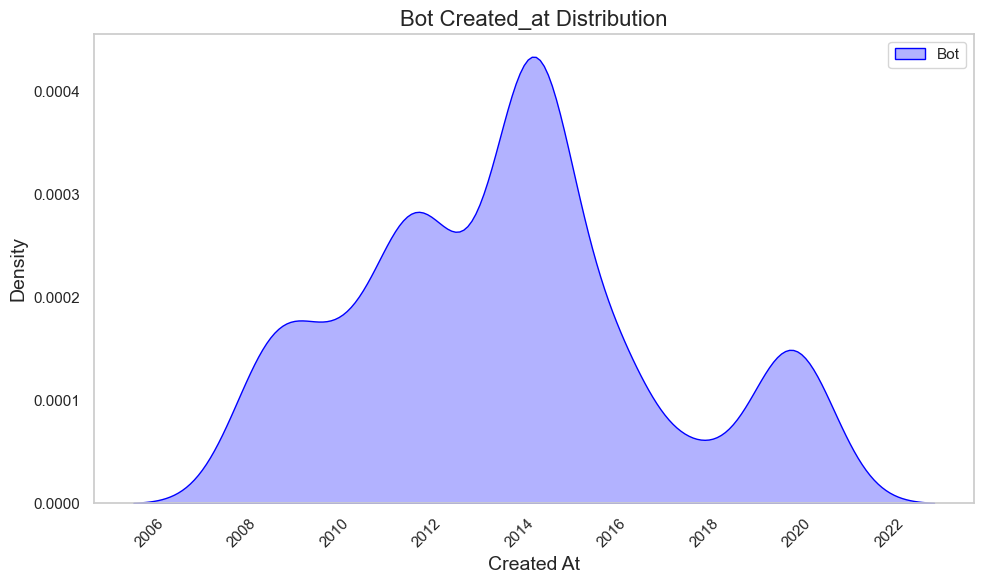

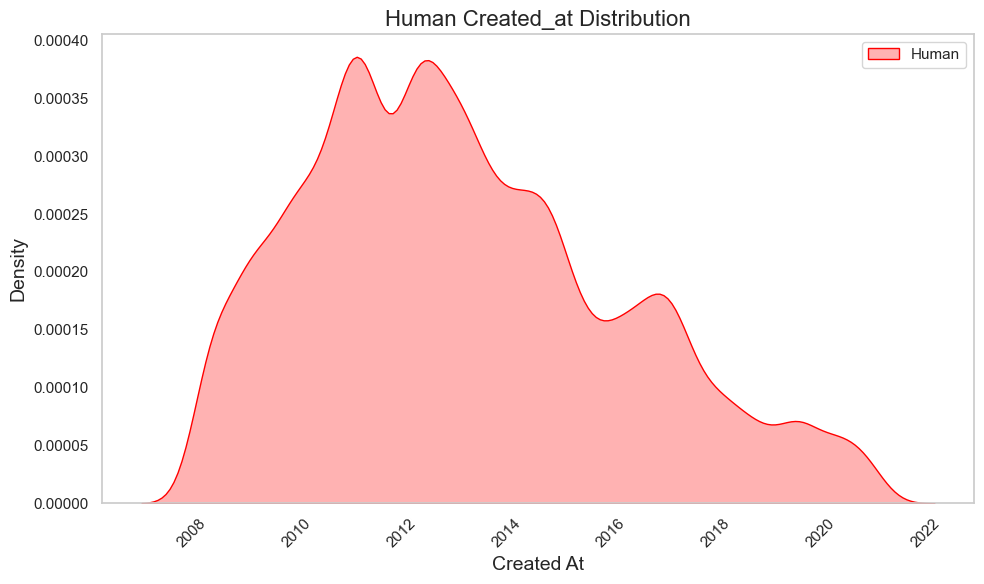

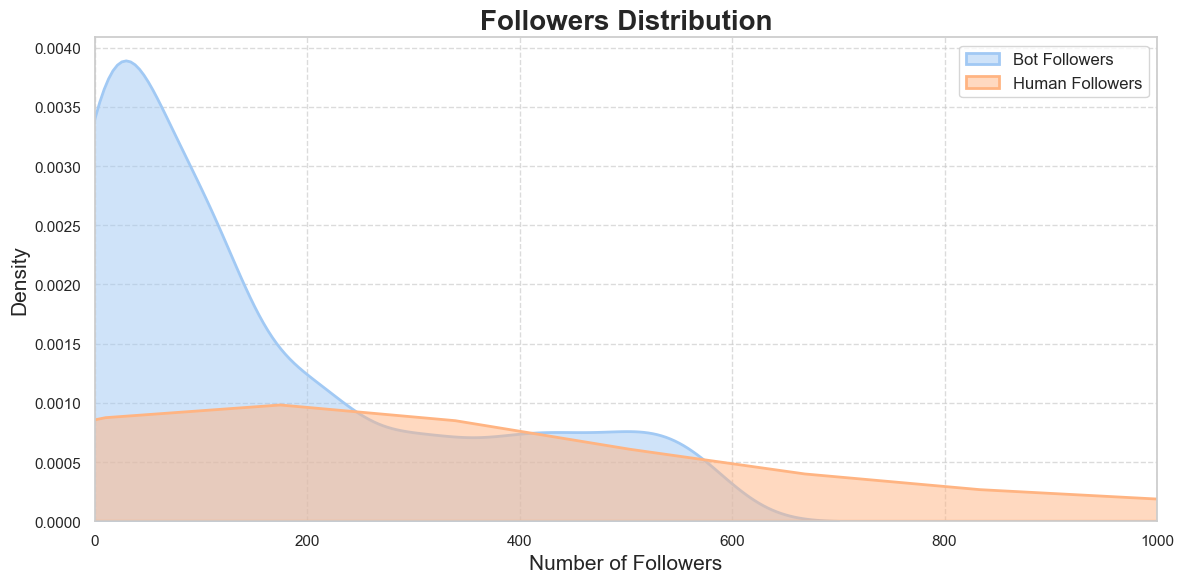

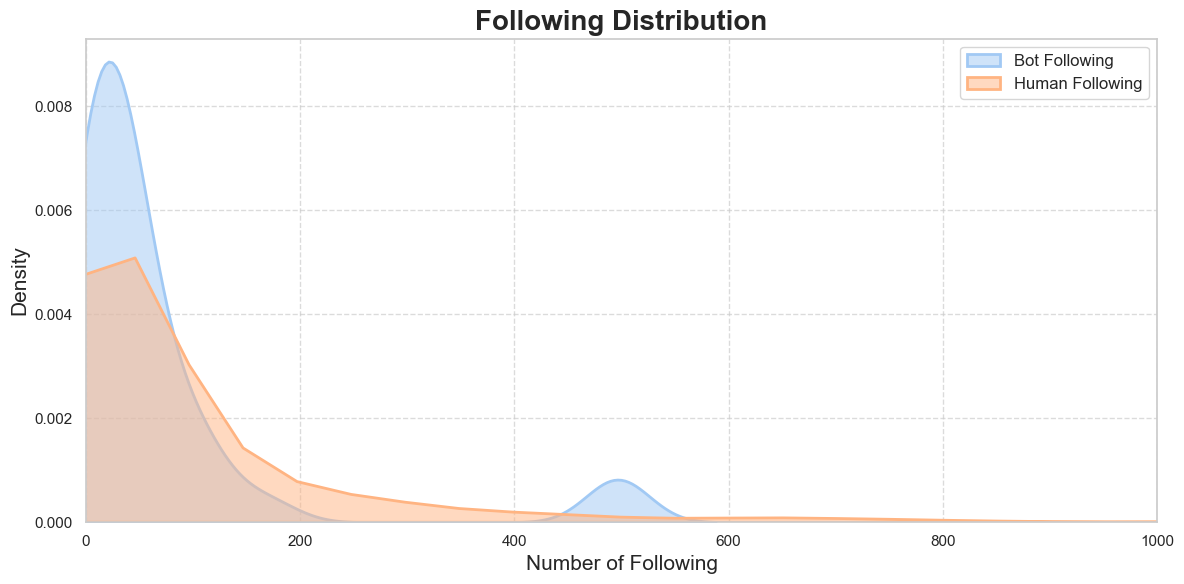

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv(r"E:\360Downloads\DaSE\CSAPP\github_bot_raw_data.csv") 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
#数据预处理
print(f"初始数据量：{raw_data.shape}")
data = data.drop_duplicates()
print(f"去重后数据量：{data.shape}")

#缺失值处理
#首先去掉gravatar_id列，并查看各列缺失值的情况
data = data.drop(columns=['gravatar_id'])
#将site_admin转换为boolen字段
data['site_admin'] = data['site_admin'].apply(lambda x: True if x == 'True' else False)
data['hireable'] = data['hireable'].apply(lambda x: True if x == 'True' else False)

#文本数据用空字符串填充空值
data=data.dropna()
print(f"缺失值处理后数据量：{data.shape}")
data = data.fillna('')

#将created_at和updated_at转换为时间戳形式
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# #保存处理后的数据
# data.to_csv(r"E:\360Downloads\DaSE\CSAPP\Homework7_processed_data.csv", index=False)

# 设置 Seaborn 的样式
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
sns.countplot(x='label', data=data, palette='pastel')  
plt.title('Bot and Human Distribution', fontsize=16)  
plt.xlabel('Label', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

plt.show()

# 确保 'created_at' 列为日期时间格式
data['created_at'] = pd.to_datetime(data['created_at'])

# 可视化 Bot 用户的 created_at 分布
plt.figure(figsize=(10, 6))

# 绘制 Bot 用户的密度曲线
sns.kdeplot(data[data['label'] == 'Bot']['created_at'], color='blue', label='Bot', fill=True, alpha=0.3, bw_adjust=0.5)

plt.title('Bot Created_at Distribution', fontsize=16)
plt.xlabel('Created At', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(rotation=45)  # 使日期标签倾斜，避免重叠

# 设置 y 轴范围
plt.ylim(0, plt.ylim()[1])  # 根据需要手动调整这里的范围

plt.legend()
plt.grid()  # 添加网格以增强可读性
plt.tight_layout()  # 自动调整布局
plt.show()

#可视化human类型账号的created_at情况
plt.figure(figsize=(10, 6))


# 绘制 human 用户的密度曲线
sns.kdeplot(data[data['label'] == 'Human']['created_at'], color='red', label='Human', fill=True, alpha=0.3, bw_adjust=0.5)

plt.title('Human Created_at Distribution', fontsize=16)
plt.xlabel('Created At', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(rotation=45)  # 使日期标签倾斜，避免重叠

# 设置 y 轴范围
plt.ylim(0, plt.ylim()[1])  # 根据需要手动调整这里的范围

plt.legend()
plt.grid()  # 添加网格以增强可读性
plt.tight_layout()  # 自动调整布局
plt.show()



# 可视化 Bot 和 Human 用户的 created_at 分布
# 设定风格和调色板
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# 可视化 Bot 和 Human 用户的粉丝分布
plt.figure(figsize=(12, 6))

# 绘制 Bot 用户的粉丝密度曲线
sns.kdeplot(data[data['label'] == 'Bot']['followers'], color=palette[0], label='Bot Followers', fill=True, alpha=0.5, bw_adjust=0.5, linewidth=2)

# 绘制 Human 用户的粉丝密度曲线
sns.kdeplot(data[data['label'] == 'Human']['followers'], color=palette[1], label='Human Followers', fill=True, alpha=0.5, bw_adjust=0.5, linewidth=2)

plt.title('Followers Distribution', fontsize=20, fontweight='bold')  # 加大标题和加粗
plt.xlabel('Number of Followers', fontsize=15)
plt.ylabel('Density', fontsize=15)

# 限制横坐标范围
plt.xlim(0, 1000)  # 根据你的数据，将范围设置为合适的值，例如 0 到 1000

# 设置 y 轴范围
plt.ylim(0, plt.ylim()[1])

plt.legend(loc='upper right', fontsize=12)  # 图例位置和字体大小
plt.grid(linestyle='--', alpha=0.7)  # 细网格线，增加可读性
plt.tight_layout()  # 自动调整布局
plt.show()

# 可视化 Bot 和 Human 用户的关注分布
plt.figure(figsize=(12, 6))

# 绘制 Bot 用户的关注密度曲线
sns.kdeplot(data[data['label'] == 'Bot']['following'], color=palette[0], label='Bot Following', fill=True, alpha=0.5, bw_adjust=0.5, linewidth=2)

# 绘制 Human 用户的关注密度曲线
sns.kdeplot(data[data['label'] == 'Human']['following'], color=palette[1], label='Human Following', fill=True, alpha=0.5, bw_adjust=0.5, linewidth=2)

plt.title('Following Distribution', fontsize=20, fontweight='bold')  # 加大标题和加粗
plt.xlabel('Number of Following', fontsize=15)
plt.ylabel('Density', fontsize=15)

# 限制横坐标范围
plt.xlim(0, 1000)  # 根据你的数据，将范围设置为合适的值，例如 0 到 1000

# 设置 y 轴范围
plt.ylim(0, plt.ylim()[1])

plt.legend(loc='upper right', fontsize=12)  # 图例位置和字体大小
plt.grid(linestyle='--', alpha=0.7)  # 细网格线，增加可读性
plt.tight_layout()  # 自动调整布局
plt.show()